PROJEKT - Analiza danych

Projekt dotyczy analizy danych ofert sprzedaży mieszkań z  15 największych miast w Polsce. Są to  Białystok
Bydgoszcz
Częstochowa
Gdańsk
Gdynia
Katowice
Kraków
Lublin
Łódź
Poznań
Radom
Rzeszów
Szczecin
Warszawa
Wrocław

Podział zadań:
Czyszczenie, przekształcanie danych i statystyki opisowe - Mikołaj, Maja - osoba sprawdzająca
Eksploracyjna analiza danych i wizuaizacje - Michał, Mikołaj - osoba sprawdzająca
Wnioskowanie statystyczne - Maja, Michał - osoba sprawdzająca


In [78]:
#Importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


Wyjaśnienia zmiennych 

- **city** — Nazwa miasta, w którym znajduje się nieruchomość.
- **type** — Typ budynku (np. blockOfFlats – blok, apartmentBuilding – kamienica/budynek wielorodzinny).
- **squareMeters** — Powierzchnia mieszkania w metrach kwadratowych (m²).
- **rooms** — Liczba pokoi w mieszkaniu.
- **floor** — Piętro, na którym zlokalizowane jest mieszkanie.
- **floorCount** — Całkowita liczba pięter w budynku.
- **buildYear** — Rok budowy budynku.
- **latitude, longitude** — Współrzędne geograficzne nieruchomości.
- **centreDistance** — Odległość od centrum miasta (w km).
- **poiCount** — Liczba punktów użyteczności publicznej (POI) w promieniu 500 m od mieszkania.
- **[poiName]Distance** — Odległość do najbliższego punktu użyteczności publicznej danego typu (np. schoolDistance, pharmacyDistance).
- **ownership** — Rodzaj własności (np. condominium – własność, cooperative – spółdzielcze).
- **condition** — Stan/standard wykończenia mieszkania (np. premium, high, low).
- **has[features]** — Zmienne logiczne (tak/nie) opisujące udogodnienia:
-  **hasParkingSpace**, **hasBalcony**, **hasElevator**, **hasSecurity**, **hasStorageRoom**.
- **price** — Cena oferty w Polskich Złotych (PLN).


In [79]:
# pobranie danych z pliku CSV i wyświetlenie pierwszych kilku wierszy
import pandas as pd
df = pd.read_csv("apartments_pl_2024_06.csv", encoding="utf-8")
print(df.head())

                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...             0.085  condominium      concreteS

In [80]:
# Dodawanie zmiennej 'price_per_m2'
df['pricePerM2'] = df['price'] / df['squareMeters']   
print(df)

                                     id       city               type  \
0      811891f98a870dfd6e414374a0a85560   szczecin       blockOfFlats   
1      adaf636d0c44d8d9325bce42403eefee   szczecin  apartmentBuilding   
2      9b957bd60885a469c96f17b58a914f4b   szczecin  apartmentBuilding   
3      74fef2ff7135bc70797a3fbfd7d44ed6   szczecin       blockOfFlats   
4      77cc78c75b0d09bf84d6d3124a28803c   szczecin       blockOfFlats   
...                                 ...        ...                ...   
21496  ca83fdbc19c1e62e1cc6b6b21dcd5e03  bydgoszcz                NaN   
21497  204c93689b7cdc62a17ef3c0dbf7034a  bydgoszcz           tenement   
21498  bb19da639a2de8bba49be2ca49053c87  bydgoszcz           tenement   
21499  1e7f4f1fdfea31eb84e071d697839632  bydgoszcz                NaN   
21500  60fcbfa2a2a48ebcc2e554efba7f2729  bydgoszcz           tenement   

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
0             47.00    2.0    6.0        12.0     19

In [81]:
# liczba brakujacych danych (całkowita)
n_miss = df.isna().sum().sum()
print("n_miss:", n_miss)  

# liczba kompletnych obserwacji (wierszy bez braków)
n_complete = df.dropna().shape[0]
print("n_complete:", n_complete)  # liczba kompletnych obserwacji

# proporcja braków (w skali całego dataframe)
prop_miss = n_miss / (df.shape[0] * df.shape[1])
print("prop_miss:", prop_miss)  # proporcja brakujacych danych

# dodatkowo: brakujące wartości na kolumnę (opcjonalne)
print("missing per column:\n", df.isna().sum())

# show computed values (do not call integers/floats as functions)
print("n_complete (computed):", n_complete)  # liczba kompletnych obserwacji
print("prop_miss (computed):", prop_miss)    # proporcja

n_miss: 37990
n_complete: 2750
prop_miss: 0.060927398725640666
missing per column:
 id                          0
city                        0
type                     4397
squareMeters                0
rooms                       0
floor                    3573
floorCount                209
buildYear                3380
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             11
clinicDistance             63
postOfficeDistance         20
kindergartenDistance       19
restaurantDistance         31
collegeDistance           584
pharmacyDistance           30
ownership                   0
buildingMaterial         8792
condition               15921
hasParkingSpace             0
hasBalcony                  0
hasElevator               960
hasSecurity                 0
hasStorageRoom              0
price                       0
pricePerM2                  0
dtype: int64
n_complete (computed): 2750
prop_

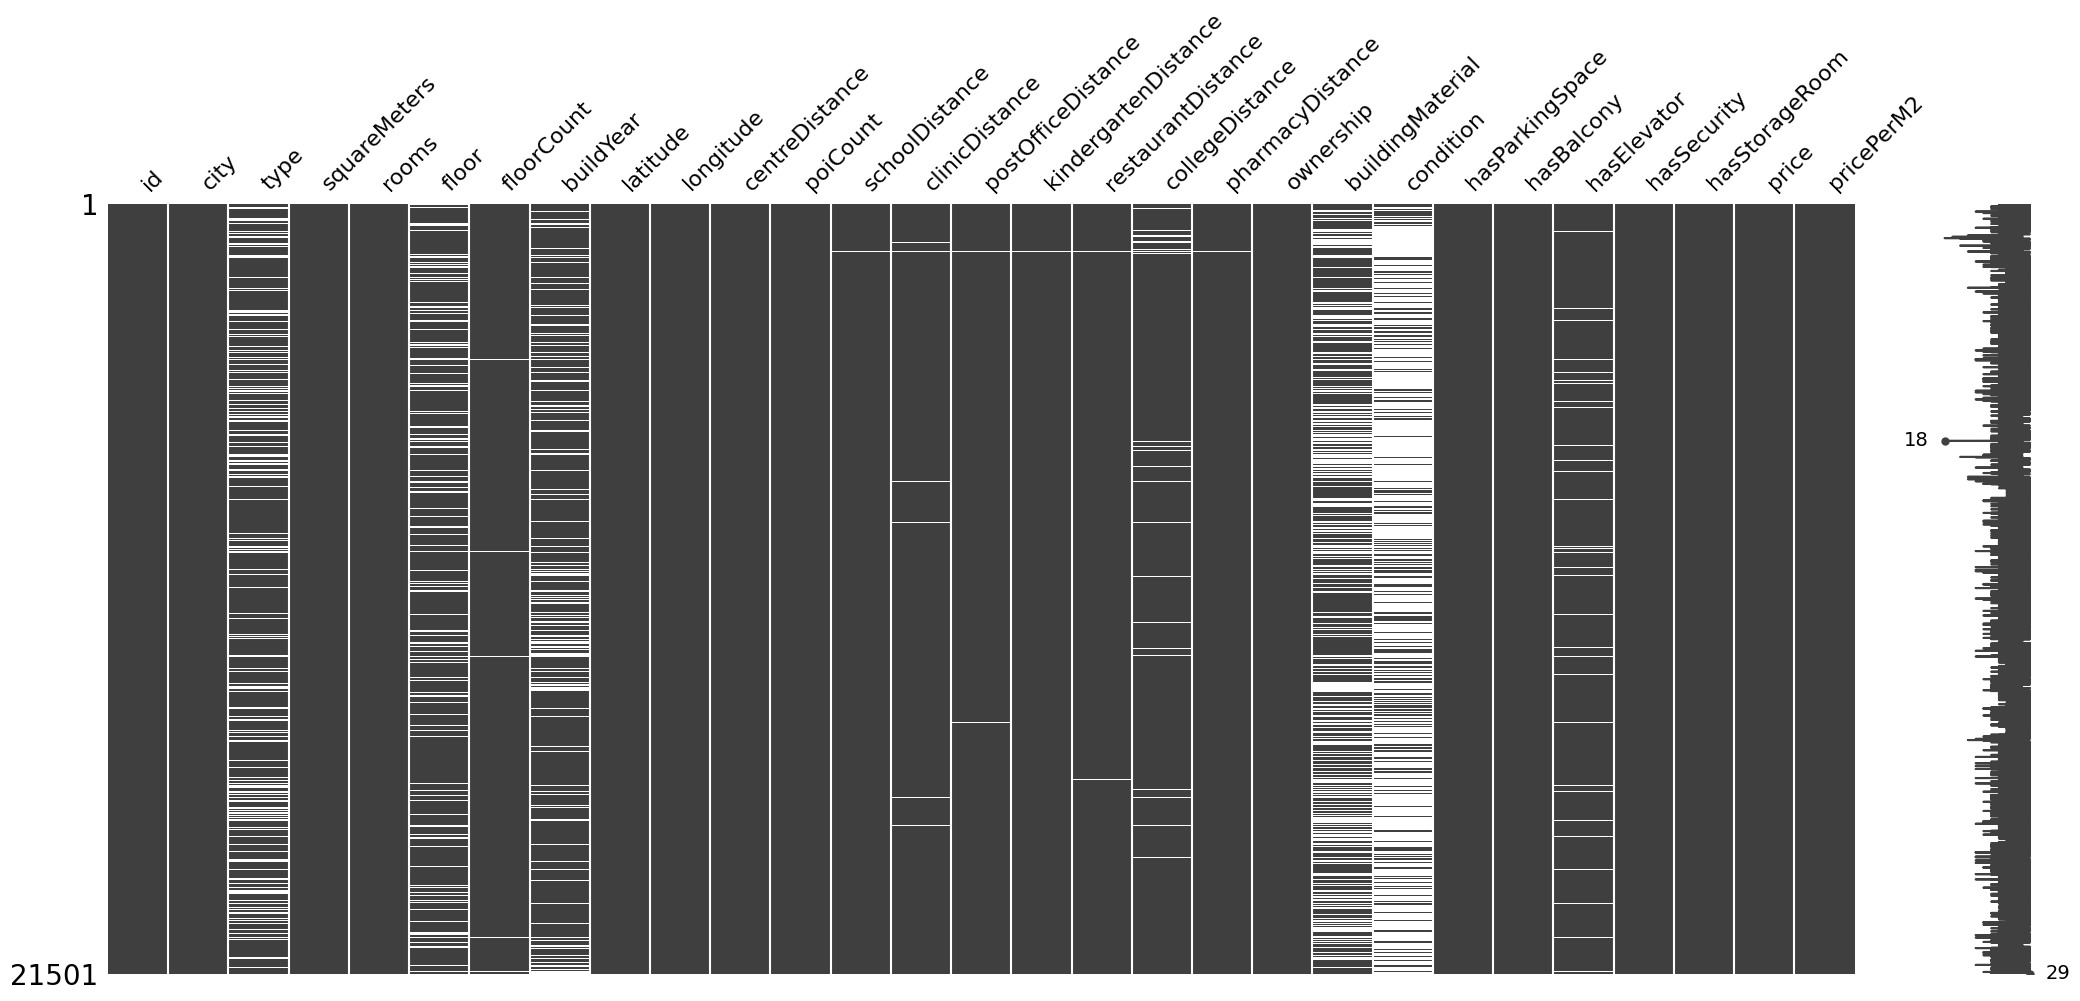

In [82]:
# wizualizacja brakujących danych 
import missingno as msno
# jeśli plt nie jest zdefiniowane (np. komórka z importem nie została uruchomiona), zaimportuj je
try:
	plt
except NameError:
	import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [83]:
# proporcja braków w poszczególnych kolumnach
prop_miss_cols = df.isna().sum() / df.shape[0]

print("Proporcje braków w kolumnach:")
print(prop_miss_cols)

# wizualizacja braków w kolumnach
prop_miss_cols_pct = df.isna().mean() * 100
print("Procent braków w kolumnach:")
print(prop_miss_cols_pct)


Proporcje braków w kolumnach:
id                      0.000000
city                    0.000000
type                    0.204502
squareMeters            0.000000
rooms                   0.000000
floor                   0.166178
floorCount              0.009720
buildYear               0.157202
latitude                0.000000
longitude               0.000000
centreDistance          0.000000
poiCount                0.000000
schoolDistance          0.000512
clinicDistance          0.002930
postOfficeDistance      0.000930
kindergartenDistance    0.000884
restaurantDistance      0.001442
collegeDistance         0.027162
pharmacyDistance        0.001395
ownership               0.000000
buildingMaterial        0.408911
condition               0.740477
hasParkingSpace         0.000000
hasBalcony              0.000000
hasElevator             0.044649
hasSecurity             0.000000
hasStorageRoom          0.000000
price                   0.000000
pricePerM2              0.000000
dtype: float6

Wykres przedstawia brakujące wartości w badanym zbiorze danych.
 Ciemne pola to dane kompletne, a białe brakujące.
 Zmienne niemal kompletne to: city, type, squareMeters, rooms, latitude, longitude, price.
 Są one istotnymi zmiennymi w kwestii zróżnicowania mieszkań i są całkowicie pozbawione braków.
 Przedstawia to jednolity ciemny wykres. Występują również zmienne z umiarkowanymi brakami. Sądzac z wykresu braki występują losowo i  raczej równomiernie w kolumnach: floorCount (0.9%),  zmiennych określajacych dystans ( które są też mniejsze niż 1%). 
 Zmienne : type, buildingMaterial i condition, mają duża częśc obserwacji brakujących. Jesto to odpowiednio 20%, 41%,74%. Będą one szczególnej uwagi przy czyszczeniu danych imputacja lub ich usunięcie.Podsumowując, większość kluczowych danych lokalizacja, metraż, cena jest kompletna, co czyni zbiór gotowym do dalszej analizy. Braki koncentrują się głównie na zmiennych opisujących wyposażenie i stan budynku.

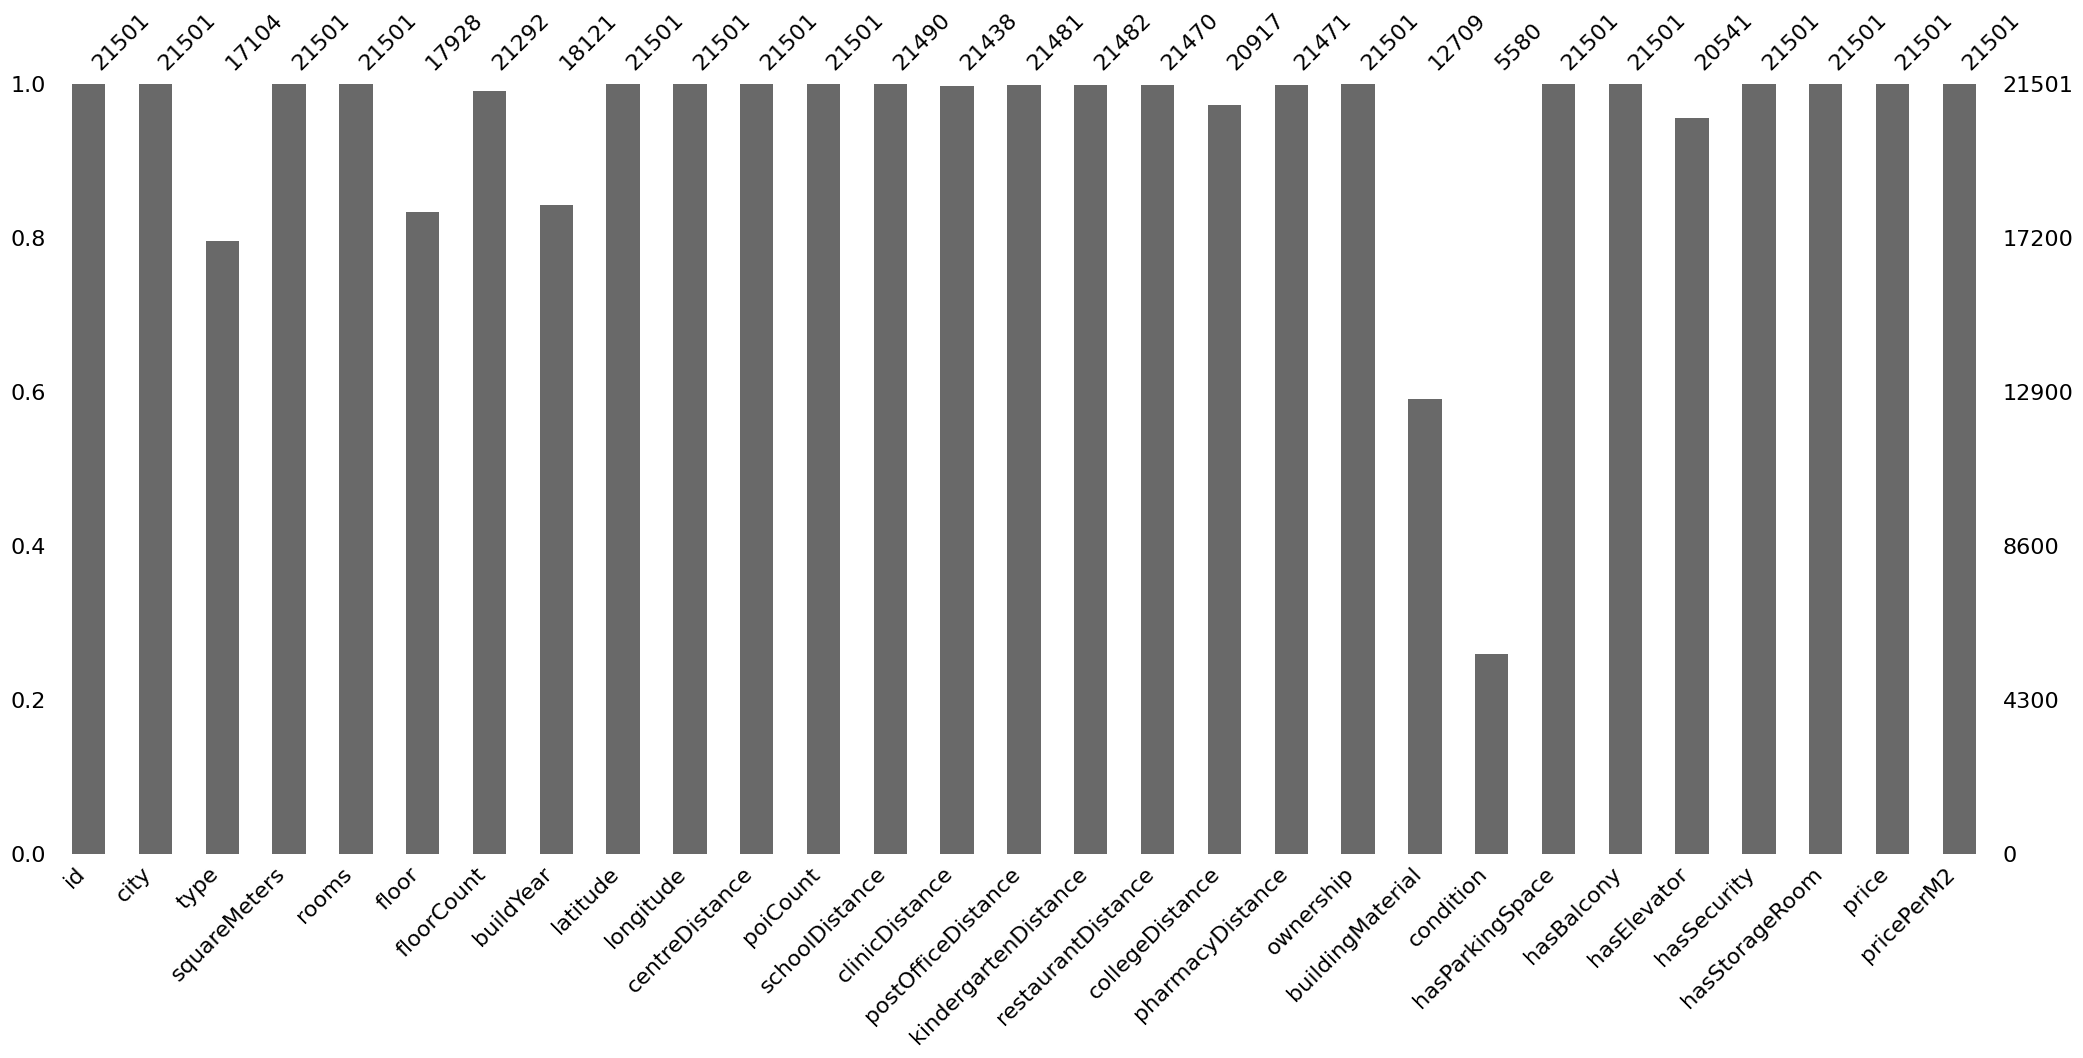

In [84]:

msno.bar(df)
plt.show()

In [85]:
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x)
    else:
        return x.isna()

df.apply(is_special)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,pricePerM2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,False,False,True,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
21497,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
21498,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
21499,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [86]:
import numpy as np
import pandas as pd

# Twoja funkcja definująca co jest "specjalne"
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x) # Zwraca True dla NaN oraz inf/-inf
    else:
        return x.isna()
total_special = df.apply(is_special).sum()
just_na = df.isna().sum()
def count_inf(x):
    if np.issubdtype(x.dtype, np.number):
        return np.isinf(x).sum()
    return 0

just_inf = df.apply(count_inf)

# Tabela podsumowującą
raport = pd.DataFrame({
    'Wszystkie Specjalne': total_special,
    'Tylko Braki (NA)': just_na,
    'Tylko Nieskończoności (Inf)': just_inf
})

# Filtrujemy, żeby pokazać tylko kolumny, gdzie cokolwiek wykryto
raport_z_bledami = raport[raport['Wszystkie Specjalne'] > 0]

print(raport_z_bledami)

                      Wszystkie Specjalne  Tylko Braki (NA)  \
type                                 4397              4397   
floor                                3573              3573   
floorCount                            209               209   
buildYear                            3380              3380   
schoolDistance                         11                11   
clinicDistance                         63                63   
postOfficeDistance                     20                20   
kindergartenDistance                   19                19   
restaurantDistance                     31                31   
collegeDistance                       584               584   
pharmacyDistance                       30                30   
buildingMaterial                     8792              8792   
condition                           15921             15921   
hasElevator                           960               960   

                      Tylko Nieskończoności (Inf)  
ty

In [87]:
# Liczba wierszy do odrzucenia (mają złą cenę LUB zły rok)
liczba_do_odrzucenia = ((df["price"] < 150000)).sum()

print(f"Liczba ofert do odrzucenia: {liczba_do_odrzucenia}")


Liczba ofert do odrzucenia: 0


W zbiorze danych występują jedynie braki danych w postaci wartości NaN (braków typowych). Nie ma innych "specjalnych" braków, takich jak nieskończoności (Inf) czy wartości nieprawidłowe np. cena poniżej 150 tys złotych.

<Figure size 1200x500 with 0 Axes>

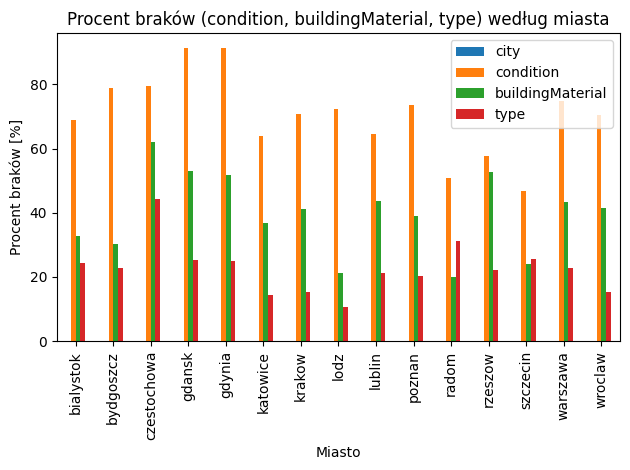

In [88]:


# --- Funkcja: procent braków wg miasta ---
def gg_miss_city_selected(df, 
                          city_col="city",
                          selected_cols=["condition", "buildingMaterial", "type"],
                          figsize=(12,5)):

    # filtr tylko wybranych kolumn
    df_selected = df[[city_col] + selected_cols]

    # liczba obserwacji w każdym mieście
    count_by_city = df_selected.groupby(city_col).size()

    # liczba braków w poszczególnych kolumnach wg miasta
    miss_count = df_selected.isna().groupby(df_selected[city_col]).sum()

    # procent braków = (liczba braków / liczba rekordów) * 100
    miss_pct = (miss_count.T / count_by_city).T * 100

    # wykres
    plt.figure(figsize=figsize)
    miss_pct.plot(kind="bar")
    plt.title("Procent braków (condition, buildingMaterial, type) według miasta")
    plt.ylabel("Procent braków [%]")
    plt.xlabel("Miasto")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# --- Wywołanie ---
gg_miss_city_selected(df)


In [89]:
# Oblicz procent braków w danych dla każdego miasta (liczony jako: brakujące wartości / (liczba rekordów * liczba kolumn) * 100)
n_cols = df.shape[1]
city_counts = df.groupby("city").size()
missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())
missing_pct_by_city = (missing_counts / (city_counts * n_cols)) * 100

# Posortuj malejąco i pokaż wynik
missing_pct_by_city = missing_pct_by_city.sort_values(ascending=False)
print(missing_pct_by_city)

# Najgorsze miasto
worst_city = missing_pct_by_city.index[0]
worst_pct = missing_pct_by_city.iloc[0]
print(f"\nMiasto z największym procentem braków: {worst_city} ({worst_pct:.2f}%)")

city
czestochowa    9.252127
gdynia         7.816925
gdansk         7.236865
bydgoszcz      6.502778
katowice       6.431354
poznan         6.348654
rzeszow        6.113814
warszawa       5.940128
krakow         5.770150
wroclaw        5.593769
lublin         5.514838
bialystok      5.478430
lodz           5.460960
szczecin       5.020519
radom          4.916004
dtype: float64

Miasto z największym procentem braków: czestochowa (9.25%)


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_37092/4292239163.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())


Na przedstawionym wykresie kolumnowym widzimy udział brakujących wartości dla trzech zmiennych opisujących oferty mieszkaniowe analizowane w tym projekcie: condition, buildingMaterial oraz type, pogrupowanych według miasta. Brak definiujemy jako brak jednej zmiennej w danym ogłoszeniu.
Najbardziej wyróżnia się zmienna condition, która we wszystkich miastach charakteryzuje się zdecydowanie najwyższym odsetkiem braków. 
W przypadku pozostałych zmiennych udziały braków są mniejsze, choć zauważalnie zróżnicowane pomiędzy miastami. Co ciekawe, mimo że średni poziom braków w zmiennej buildingMaterial jest wyższy, to w części miast występuje odwrotna zależność — np. w Częstochowie i Gdansku odsetek braków dla type jest większy niż dla buildingMaterial.
Miasta o najniższej jakości pełnych informacji w ogłoszeniach to:

Częstochowa – niemal 10% wszystkich informacji w analizowanych zmiennych jest nieuzupełnionych,

Gdynia – około 8%,

Gdańsk – blisko 7,5%.

Wskazuje to, że w tych miastach użytkownicy rynku nieruchomości mogli częściej napotkać niekompletne opisy ofert w czerwcu 2024, co mogło utrudniac porównywanie mieszkań i podejmowanie decyzji zakupowych.

In [90]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # Konieczne aktywowanie
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer

# 1. Grupa: Dane opisowe z dużymi brakami condition i buildingMaterial - usuwamy
df.drop(columns=['condition', 'buildingMaterial'], inplace=True)


# 2. Grupa: Numeryczne ważne (floor, buildYear,floorCount i wszystkie zmienne distance) 
import pandas as pd
import numpy as np


# A. Lista zmiennych, które chcesz naprawić metodą MICE
cols_to_impute = [
    'buildYear', 
    'floor', 
    'floorCount', 
    'centreDistance',
    'poiCount',
    'schoolDistance',
    'clinicDistance',
    'postOfficeDistance',
    'kindergartenDistance',
    'restaurantDistance',
    'collegeDistance',
    'pharmacyDistance'
]

# B. Konfiguracja imputera (random_state dla powtarzalności wyników)
iter_imputer = IterativeImputer(random_state=42)

# C. Wykonanie imputacji TYLKO na wybranych kolumnach
# Wynik fit_transform to macierz NumPy, więc przypisujemy ją z powrotem do tych samych kolumn w df
df[cols_to_impute] = iter_imputer.fit_transform(df[cols_to_impute])

# D. Zaokrąglamy rok budowy, piętro na którym znajduje się mieszkanie i liczbę pięter do liczb całkowitych. 
cols_integers = ['buildYear', 'floor', 'floorCount']

for col in cols_integers:
    # 
    df[col] = df[col].round().astype('Int64') # Int64 (z dużej litery) pozwala zachować format integer

# E. Sprawdzenie efektów (czy zniknęły braki w tych kolumnach)
print("Braki danych po MICE:")
print(df[cols_to_impute].isna().sum())

# 3. Grupa: Winda (binarna/kategoryczna) -> KNN Imputer
from sklearn.impute import KNNImputer
import numpy as np

# 1. PRZYGOTOWANIE: Zamieniamy YES/NO na 1/0 
df['hasElevator'] = df['hasElevator'].map({'yes':1, 'no':0})
df['hasElevator'] = df['hasElevator'].astype(float)



from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#  Wybór cech: Winda (cel) + Lokalizacja + Cechy budynku
# Dodajemy latitude i longitude
features_knn = ['hasElevator', 'latitude', 'longitude', 'floorCount', 'buildYear']

#  PRZYGOTOWANIE DANYCH (Skalowanie)
# Tworzymy tymczasową kopię danych do obliczeń
df_temp = df[features_knn].copy()

# Skaler sprowadzi wszystkie kolumny do zakresu 0-1
scaler = MinMaxScaler()
df_temp_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=features_knn)

#  URUCHOMIENIE KNN NA PRZESKALOWANYCH DANYCH
# Teraz odległość geograficzna ma takie samo znaczenie jak rok budowy
knn_imputer = KNNImputer(n_neighbors=5)
df_filled_scaled = knn_imputer.fit_transform(df_temp_scaled)

#  ODZYSKANIE WYNIKU
# Wynik jest w skali 0-1. Interesuje nas tylko kolumna hasElevator (indeks 0 w features_knn)
# Musimy ją "odwrócić" ze skalowania lub po prostu zaokrąglić, 
# bo dla 0 i 1 MinMaxScaler(0,1) nie zmienia wartości logicznej, ale dla pewności:

# Wyciągamy kolumnę z macierzy (to są ułamki np. 0.8, 0.2)
imputed_values = df_filled_scaled[:, 0]

# Zaokrąglamy do 0 lub 1 i przypisujemy do oryginalnego DataFrame
df['hasElevator'] = imputed_values.round().astype('int64')

# Sprawdzenie
print("Braki po KNN z lokalizacją:", df['hasElevator'].isna().sum())


## teraz imputacja zmiennej typu budynku (type) za pomocą KNN z lokalizacją

#  WYBÓR CECH 
# Typ budynku zależy mocno od: roku budowy, liczby pięter i lokalizacji.
features = ['latitude', 'longitude', 'buildYear', 'floorCount']
target = 'type'

# 2. PRZYGOTOWANIE DANYCH
# Musimy podzielić dane na dwie grupy:
# A. Treningowe: Tam gdzie ZNAMY typ (uczymy się na nich)
# B. Do uzupełnienia: Tam gdzie typ to NaN (będziemy zgadywać)
train_data = df[df[target].notna()].copy()
missing_data = df[df[target].isna()].copy()

# Jeśli nie ma czego uzupełniać, kończymy
if len(missing_data) > 0:
    
    # 3. SKALOWANIE 
    # Żeby rok budowy (2000) nie zdominował współrzędnych (52.00)
    scaler = MinMaxScaler()
    
    # Skalujemy cechy w obu zestawach
    X_train = scaler.fit_transform(train_data[features])
    X_missing = scaler.transform(missing_data[features]) # Ważne: transform, nie fit_transform!
    
    # Nasz cel (etykiety) - to są teksty, np. "tenement", "block"
    y_train = train_data[target]

    # 4. KONFIGURACJA I NAUKA (Głosowanie)
    # n_neighbors=10: Spytaj 10 najbliższych budynków, czym są.
    # weights='distance': Bliżsi sąsiedzi mają ważniejszy głos.
    from sklearn.neighbors import KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn_classifier.fit(X_train, y_train)

    # 5. PRZEWIDYWANIE (Uzupełnianie braków)
    predicted_types = knn_classifier.predict(X_missing)

    # 6. WSTAWIENIE DO TABELI
    # Wstawiamy przewidziane wartości tylko tam, gdzie były braki
    df.loc[df[target].isna(), target] = predicted_types

    print("Sukces! Braki w 'type' po głosowaniu sąsiadów:", df['type'].isna().sum())
    
else:
    print("Brak brakujących danych w kolumnie 'type'.")



# 5.Sprawdzenie czy czysto
print("Pozostałe braki:", df.isna().sum().sum())

Braki danych po MICE:
buildYear               0
floor                   0
floorCount              0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
dtype: int64
Braki po KNN z lokalizacją: 0
Sukces! Braki w 'type' po głosowaniu sąsiadów: 0
Pozostałe braki: 0


In [91]:
# Pokaż kolumny i liczbę brakujących wartości (oraz procent braków)
missing_count = df.isna().sum()
missing_pct = df.isna().mean() * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values(by='missing_count', ascending=False)

# Wyświetl wszystkie kolumny (posortowane malejąco według liczby braków)
print(missing_summary)

# Jeśli chcesz tylko kolumny z brakami:
print("\nKolumny z brakami:")
print(missing_summary[missing_summary['missing_count'] > 0])

                      missing_count  missing_pct
id                                0          0.0
postOfficeDistance                0          0.0
price                             0          0.0
hasStorageRoom                    0          0.0
hasSecurity                       0          0.0
hasElevator                       0          0.0
hasBalcony                        0          0.0
hasParkingSpace                   0          0.0
ownership                         0          0.0
pharmacyDistance                  0          0.0
collegeDistance                   0          0.0
restaurantDistance                0          0.0
kindergartenDistance              0          0.0
clinicDistance                    0          0.0
city                              0          0.0
schoolDistance                    0          0.0
poiCount                          0          0.0
centreDistance                    0          0.0
longitude                         0          0.0
latitude            

Wnioskowanie statystyczne

In [ ]:
# Zamiana zmiennych binarnych kategorycznych z 'yes'/'no' na 1/0
cols = ["hasParkingSpace", "hasBalcony", "hasSecurity", "hasStorageRoom"]
for col in cols:
    print(col, df[col].unique())

df[cols] = df[cols].applymap(lambda x: 1 if x == 'yes' else 0)
df.head()

hasParkingSpace ['no' 'yes']
hasBalcony ['yes' 'no']
hasSecurity ['no' 'yes']
hasStorageRoom ['yes' 'no']


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_37092/2740786802.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: 1 if x == 'yes' else 0)


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,pricePerM2
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6,12,1981,53.428544,14.552812,...,0.593,0.085,condominium,0,1,1,0,1,449000,9553.191489
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1,2,2000,53.449093,14.516844,...,1.192,0.668,condominium,1,1,0,0,0,950000,10768.533212
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4,4,1983,53.443096,14.561348,...,1.522,0.229,udział,1,1,0,0,0,1099000,9393.162393
3,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1,4,1963,53.436100,14.541200,...,0.041,0.388,cooperative,1,0,0,1,1,380000,11407.985590
4,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7,7,2018,53.447465,14.557811,...,1.643,0.178,condominium,1,1,1,1,1,799000,14267.857143


In [96]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm


# -----------------------------
# 1. Sprawdzenie czy próba jest wystarczająca
# -----------------------------

n = len(df)
print("Liczba obserwacji:", n)

# Reguła kciuka – dla średniej zazwyczaj n > 30 wystarcza
print("Czy próba jest wystarczająca do estymacji średniej? ->", n > 30)

# Dla proporcji – min 10 sukcesów i 10 porażek
def check_proportion_condition(series):
    successes = (series == 1).sum()
    failures = (series == 0).sum()
    return successes >= 10 and failures >= 10

for col in ["hasParkingSpace", "hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]:
    print(col, check_proportion_condition(df[col]))

Liczba obserwacji: 21501
Czy próba jest wystarczająca do estymacji średniej? -> True
hasParkingSpace True
hasBalcony True
hasElevator True
hasSecurity True
hasStorageRoom True
